# Import libs

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.metrics import classification_report

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
X_train[0].shape

(28, 28)

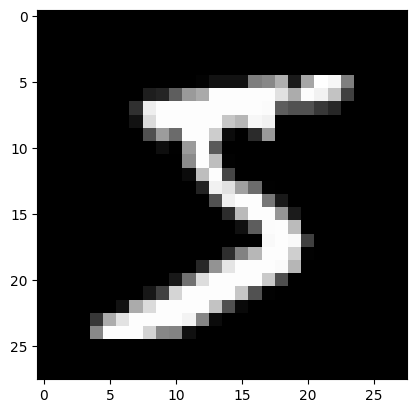

In [8]:
plt.imshow(X_train[0], cmap='gray')

# Util function
Display the image & its label

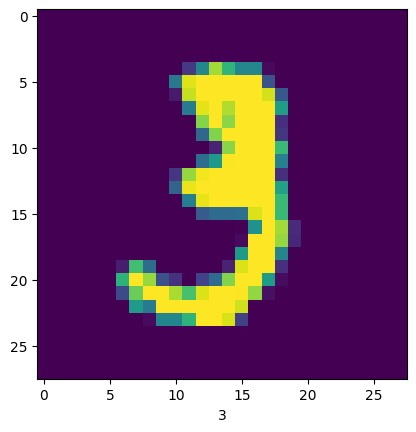

In [9]:
def plot_image(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(y[index])
    
plot_image(X_train, y_train, 10)

# Preprocessing
Scale X data 

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# CNN model - Build, compile, Fit, Evaluate

In [13]:
def build_compile_model(optimizer="adam", loss="sparse_categorical_crossentropy",
                metrics=["accuracy"]):

    model = keras.Sequential([
    
    #cnn
    keras.layers.Conv1D(filters=28, kernel_size=(3),input_shape=(28,28), activation="relu"),
    keras.layers.MaxPool1D(pool_size=(2)),
    
    keras.layers.Conv1D(filters=28, kernel_size=(3), activation="relu"),
    keras.layers.MaxPool1D(pool_size=(2)),
    
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(56, activation="relu"),
    keras.layers.Dense(10, activation="softmax")    
    ])

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

def fit_model(model, X_train, y_train, validation_data, epochs=10):
    return model.fit(X_train, y_train, validation_data=validation_data ,epochs=epochs)

def train_model(X_train, y_train, validation_data, epochs=10, optimizer="adam", loss="sparse_categorical_crossentropy",
                metrics=["accuracy"]):

    model = build_compile_model(optimizer, loss, metrics)
    history = fit_model(model, X_train, y_train, validation_data, epochs )
    return (model, history)
    

In [15]:
model, history = train_model(X_train, y_train, validation_data=(X_test, y_test), epochs=25, optimizer="SGD")
model.save("model/cnn")

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7300 - accuracy: 0.7753 - val_loss: 0.2838 - val_accuracy: 0.9136
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2483 - accuracy: 0.9256 - val_loss: 0.2031 - val_accuracy: 0.9386
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1846 - accuracy: 0.9442 - val_loss: 0.1504 - val_accuracy: 0.9517
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1519 - accuracy: 0.9543 - val_loss: 0.1305 - val_accuracy: 0.9599
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1316 - accuracy: 0.9602 - val_loss: 0.1140 - val_accuracy: 0.9649
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1177 - accuracy: 0.9650 - val_loss: 0.1002 - val_accuracy: 0.9672
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1066 - accuracy: 0.9675 - val_loss: 0.0990 - val_accuracy:

INFO:tensorflow:Assets written to: model/cnn/assets


INFO:tensorflow:Assets written to: model/cnn/assets


In [11]:
model = keras.Sequential([
    
    #cnn
    keras.layers.Conv1D(filters=28, kernel_size=(3),input_shape=(28,28), activation="relu"),
    keras.layers.MaxPool1D(pool_size=(2)),
    
    keras.layers.Conv1D(filters=28, kernel_size=(3), activation="relu"),
    keras.layers.MaxPool1D(pool_size=(2)),
    
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(56, activation="relu"),
    keras.layers.Dense(10, activation="softmax")    
])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-05-09 19:08:50.098409: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2621 - accuracy: 0.9228
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0974 - accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0735 - accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0604 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0500 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0439 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0371 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0338 - accuracy: 0.9892
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0290 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0270 - accurac

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 584us/step - loss: 0.0495 - accuracy: 0.9849


[0.04951216280460358, 0.9848999977111816]

In [13]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 0s 604us/step


array([[2.7729088e-11, 2.4878634e-07, 8.3218811e-07, 1.2462460e-04,
        4.0053935e-10, 7.9488034e-09, 1.1334480e-15, 9.9987149e-01,
        3.2492347e-09, 2.6831410e-06],
       [2.7776633e-12, 5.1389408e-05, 9.9994862e-01, 5.3919499e-13,
        3.6644792e-13, 4.8586615e-15, 7.7114682e-13, 4.2023302e-10,
        2.0845334e-11, 2.1428247e-23],
       [4.8977444e-07, 9.9995494e-01, 3.2180870e-07, 8.8111697e-08,
        2.0803307e-05, 1.6802674e-06, 1.1214694e-06, 1.6383703e-05,
        3.3756778e-06, 7.8812946e-07],
       [9.9999976e-01, 1.6097769e-10, 5.5788846e-10, 2.9259475e-10,
        1.1737558e-09, 6.3040915e-09, 1.1769874e-07, 1.1140682e-08,
        1.2654271e-09, 1.2921933e-07],
       [3.1457716e-09, 7.9445158e-08, 1.0166710e-08, 2.4040895e-08,
        9.9993992e-01, 7.1078712e-09, 4.6463897e-10, 6.0012496e-07,
        8.9320112e-10, 5.9305301e-05]], dtype=float32)

In [14]:
y_pred = [np.argmax(x) for x in y_pred]
y_pred[:5]

[7, 2, 1, 0, 4]

In [15]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

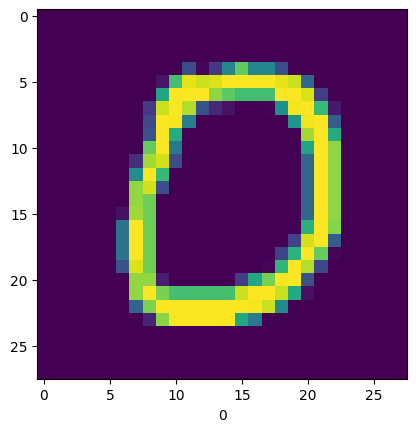

In [16]:
plot_image(X_test, y_pred, 10)

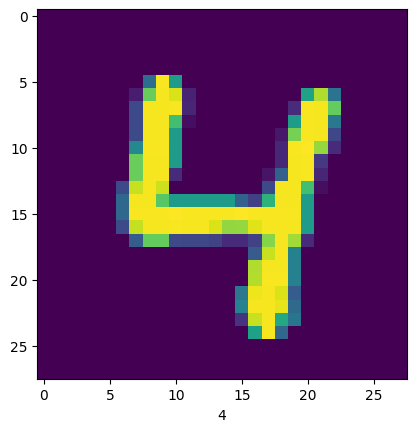

In [17]:
plot_image(X_test, y_pred, 56)

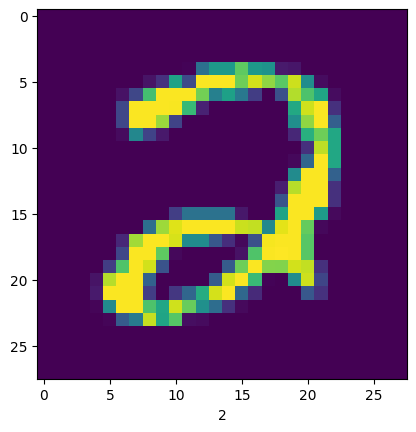

In [18]:
plot_image(X_test, y_pred, 106)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(95.72222222222221, 0.5, 'Truth')

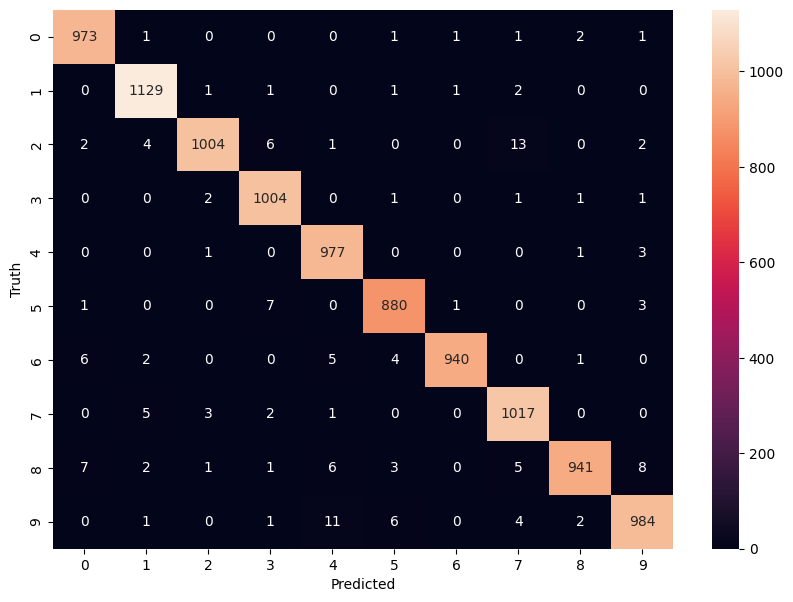

In [20]:
cm = tf.math.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [21]:
model.save("model/cnn")

INFO:tensorflow:Assets written to: model/cnn/assets


INFO:tensorflow:Assets written to: model/cnn/assets
